# Project On Wine_Quality_Prediction

## By:- Jitendra Sanjay Bhavsar

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\Wine_Quality_Dataset.csv")
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Data Preprocessing

### 1) Object Feature Transform Into Integer

In [4]:
data["type"].unique()


array(['white', 'red'], dtype=object)

In [5]:
data["type"] = data["type"].map({'white':1,'red':2})

In [6]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,2,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,2,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,2,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 2) Fill Null Values

In [7]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
data["fixed acidity"]=data["fixed acidity"].ffill()   # bfill()   # data.fillna(mean,inplace=True)
data["volatile acidity"]=data["volatile acidity"].ffill()
data["citric acid"]=data["citric acid"].ffill()
data["residual sugar"]=data["residual sugar"].ffill()
data["chlorides"]=data["chlorides"].ffill()
data["pH"]=data["pH"].ffill()
data["sulphates"]=data["sulphates"].ffill()

In [9]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3) To Check Correlation between Feature

<AxesSubplot: >

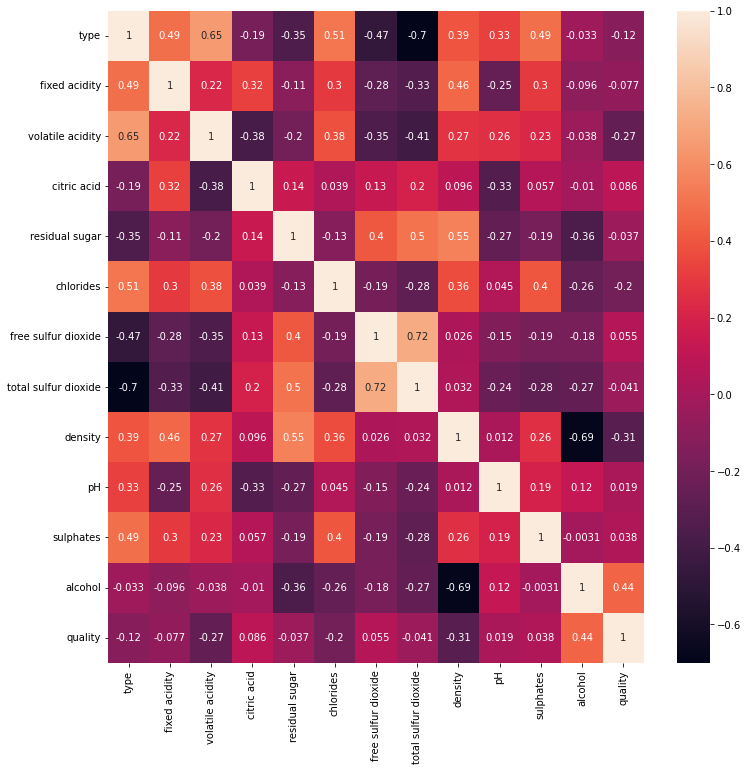

In [10]:
plt.figure(figsize=[12,12])

sns.heatmap(data.corr(), annot=True)

In [11]:
data1= data.loc[(data["quality"]!=9)]

### 4) Data Slicing

In [12]:
x1=data1.iloc[:,:-1]  # Indpt  #slicing independent and depedent variables.
y1=data1.iloc[:,-1]

### 5) Data Balancing

In [13]:
from collections import Counter
print(Counter(y1))

Counter({6: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193, 3: 30})


In [14]:
from imblearn.over_sampling import SMOTE
strategy = {6: 2836, 5: 2836, 7: 2836, 4: 2836, 8: 2836, 3: 2836}
smote1=SMOTE(sampling_strategy=strategy)
x_data,y_data=smote1.fit_resample(x1,y1)

# Benifit == Prevent from data duplication or Redundency

In [15]:
from collections import Counter
print(Counter(y_data))

Counter({6: 2836, 5: 2836, 7: 2836, 8: 2836, 4: 2836, 3: 2836})


### 6) To Check Distribution Of the dataset

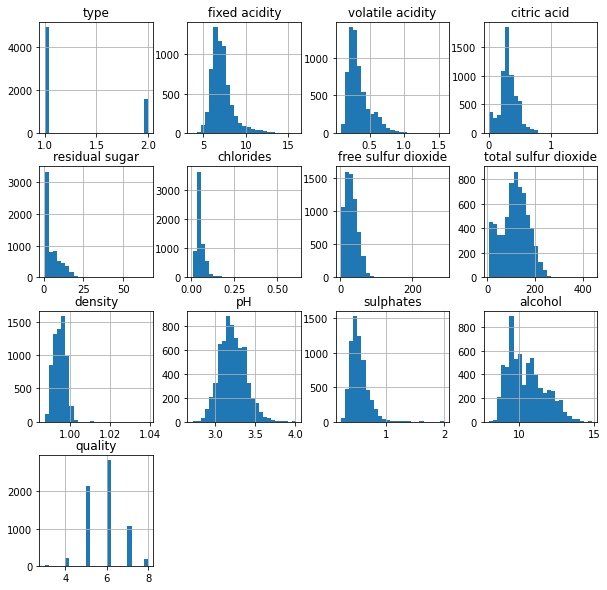

In [16]:
data1.hist(bins=25, figsize=(10,10))
plt.show()

#### From the above the major histograms is look like bell shape. 
#### So we can conclude that the dataset is follows gaussin Distribution.
#### That is the reason we can used Standardization.

In [17]:
###  Standardization                
from sklearn.preprocessing import StandardScaler  
ss=StandardScaler()
x_data1=ss.fit_transform(x_data)
x_data1[5,:]

array([-0.50511874,  0.68428382, -0.46845355,  0.68102893,  0.40802114,
       -0.2022763 ,  0.00824609, -0.25400198,  0.22036312,  0.19887181,
       -0.59886172, -0.43477065])

In [18]:
x_data1.max()    # Max value after Standardization

15.305020959222258

In [19]:
x_data1.min()    # Min value after Standardization

-3.208133658040716

## Model Training

In [20]:
# Spliting data into training testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data1,y_data,test_size=0.30, random_state=12)

## Without Using Cross Validation

## 1) KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [22]:
y_pred1= knn.predict(x_test)
y_pred1

array([3, 7, 7, ..., 8, 7, 5], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
cf_matrix1 = confusion_matrix(y_test, y_pred1)
cf_matrix1

array([[835,   0,   0,   0,   0,   0],
       [ 37, 770,  18,   9,   7,  11],
       [ 43, 144, 491, 120,  52,  22],
       [ 29,  87, 194, 254, 183,  83],
       [ 16,  29,  34,  72, 562, 143],
       [  6,   2,   1,   8,  36, 807]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred1,y_test)*100,"%")

72.85014691478942 %


## 2) SVM

In [25]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf', random_state=10)
svm.fit(x_train, y_train)

SVC(random_state=10)

In [26]:
y_pred2=svm.predict(x_test)
y_pred2

array([3, 8, 7, ..., 8, 6, 6], dtype=int64)

In [27]:
cf_matrix2 = confusion_matrix(y_test, y_pred2)
cf_matrix2

array([[789,  38,   6,   2,   0,   0],
       [ 28, 661,  94,  40,  19,  10],
       [ 19, 140, 511, 151,  38,  13],
       [ 26,  45, 177, 297, 199,  86],
       [  9,  15,  31, 106, 437, 258],
       [  1,  21,   1,  39, 122, 676]], dtype=int64)

In [28]:
print(accuracy_score(y_pred2,y_test)*100,"%")

66.03330068560234 %


## 3) Random Forest

In [29]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
rf = RandomForestRegressor(random_state = 10,max_depth = 5)
  
# fit the regressor with x and y data
rf.fit(x_train, y_train)  

RandomForestRegressor(max_depth=5, random_state=10)

In [30]:
ab=rf.predict(x_test)
y_pred3=np.round(ab)
print(Counter(y_pred3))

Counter({5.0: 1769, 7.0: 1421, 6.0: 864, 4.0: 765, 3.0: 215, 8.0: 71})


In [31]:
cf_matrix3 = confusion_matrix(y_test, y_pred3)
cf_matrix3

array([[198, 347, 258,  32,   0,   0],
       [ 13, 280, 429, 120,  10,   0],
       [  4,  93, 604, 131,  40,   0],
       [  0,  35, 335, 250, 209,   1],
       [  0,   8, 114, 217, 517,   0],
       [  0,   2,  29, 114, 645,  70]], dtype=int64)

In [32]:
print(accuracy_score(y_pred3,y_test)*100,"%")

37.59059745347698 %


## 4) Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train, y_train)


LogisticRegression(multi_class='multinomial')

In [34]:
y_pred4=lr.predict(x_test)
y_pred4

array([3, 8, 8, ..., 8, 6, 6], dtype=int64)

In [35]:
cf_matrix4 = confusion_matrix(y_test, y_pred4)
cf_matrix4

array([[448, 158,  75,  59,  10,  85],
       [142, 444, 152,  73,  22,  19],
       [ 95, 180, 387, 133,  49,  28],
       [ 75,  61, 151, 248, 149, 146],
       [ 24,  29,  64, 142, 270, 327],
       [ 43,  21,  77,  49, 165, 505]], dtype=int64)

In [36]:
print(accuracy_score(y_test, y_pred4)*100,"%")

45.09304603330069 %


## Using Cross Validation
### Strtified K Fold Cross Validation

In [37]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10, random_state=10,shuffle=True)


## 1) KNN

In [38]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
score1 = []

for train_index, test_index in skf.split(x_data1, y_data):
    x_train_fold, x_test_fold = x_data1[train_index], x_data1[test_index]
    y_train_fold, y_test_fold = y_data[train_index], y_data[test_index]
    knn.fit(x_train_fold, y_train_fold)
    y_pred11=knn.predict(x_test_fold)
    score=accuracy_score(y_pred11, y_test_fold)
    score1.append(score)
    print("y_train_fold",Counter(y_train_fold))
    print("y_test_fold",Counter(y_test_fold))
    print("y_pred11",Counter(y_pred11))
    print("score",(score)*100,"%")
    print(y_pred11)

y_train_fold Counter({7: 2553, 4: 2553, 6: 2552, 5: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({6: 284, 5: 284, 8: 284, 3: 284, 7: 283, 4: 283})
y_pred11 Counter({4: 353, 8: 342, 3: 324, 7: 293, 5: 244, 6: 146})
score 73.91304347826086 %
[3 4 3 ... 8 8 8]
y_train_fold Counter({7: 2553, 4: 2553, 6: 2552, 5: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({6: 284, 5: 284, 8: 284, 3: 284, 7: 283, 4: 283})
y_pred11 Counter({4: 355, 8: 347, 3: 316, 7: 269, 5: 242, 6: 173})
score 75.73443008225617 %
[6 7 5 ... 8 8 8]
y_train_fold Counter({5: 2553, 4: 2553, 6: 2552, 7: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({8: 284, 6: 284, 7: 284, 3: 284, 5: 283, 4: 283})
y_pred11 Counter({4: 351, 8: 333, 3: 320, 7: 269, 5: 250, 6: 179})
score 73.26674500587545 %
[4 7 8 ... 8 8 8]
y_train_fold Counter({5: 2553, 4: 2553, 6: 2552, 7: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({7: 284, 8: 284, 6: 284, 3: 284, 5: 283, 4: 283})
y_pred11 Counter({8: 342, 4: 342, 3: 325, 7: 298, 5: 253, 6: 142})
score 74.970

In [39]:
from statistics import mean
print(mean(score1)*100,"%")

74.377096212845 %


## 2) SVM

In [40]:
score2 = []
for train_index, test_index in skf.split(x_data1, y_data):
    x_train_fold, x_test_fold = x_data1[train_index], x_data1[test_index]
    y_train_fold, y_test_fold = y_data[train_index], y_data[test_index]
    svm.fit(x_train_fold, y_train_fold)
    y_pred22=svm.predict(x_test_fold)
    score=accuracy_score(y_pred22, y_test_fold)
    score2.append(score)
    print("y_train_fold",Counter(y_train_fold))
    print("y_test_fold",Counter(y_test_fold))
    print("y_pred11",Counter(y_pred22))
    print("score",(score)*100,"%")
    print(y_pred22)

y_train_fold Counter({7: 2553, 4: 2553, 6: 2552, 5: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({6: 284, 5: 284, 8: 284, 3: 284, 7: 283, 4: 283})
y_pred11 Counter({8: 344, 4: 317, 3: 314, 5: 264, 7: 260, 6: 203})
score 64.33607520564041 %
[3 6 3 ... 8 7 8]
y_train_fold Counter({7: 2553, 4: 2553, 6: 2552, 5: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({6: 284, 5: 284, 8: 284, 3: 284, 7: 283, 4: 283})
y_pred11 Counter({8: 349, 4: 308, 3: 290, 5: 271, 7: 267, 6: 217})
score 66.56874265569918 %
[3 6 5 ... 6 8 8]
y_train_fold Counter({5: 2553, 4: 2553, 6: 2552, 7: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({8: 284, 6: 284, 7: 284, 3: 284, 5: 283, 4: 283})
y_pred11 Counter({4: 356, 8: 340, 3: 279, 5: 266, 7: 255, 6: 206})
score 65.62867215041128 %
[4 7 8 ... 8 8 8]
y_train_fold Counter({5: 2553, 4: 2553, 6: 2552, 7: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({7: 284, 8: 284, 6: 284, 3: 284, 5: 283, 4: 283})
y_pred11 Counter({8: 351, 4: 312, 3: 298, 5: 268, 7: 261, 6: 212})
score 64.688

In [41]:
from statistics import mean
print(mean(score2)*100,"%")

65.89109468336521 %


## 3) Random Forest

In [42]:
score3 = []
for train_index, test_index in skf.split(x_data1, y_data):
    x_train_fold, x_test_fold = x_data1[train_index], x_data1[test_index]
    y_train_fold, y_test_fold = y_data[train_index], y_data[test_index]
    rf.fit(x_train_fold, y_train_fold)
    y_pred333=rf.predict(x_test_fold)
    y_pred33=np.round(y_pred333)
    score=accuracy_score(y_pred33, y_test_fold)
    score3.append(score)
    print("y_train_fold",Counter(y_train_fold))
    print("y_test_fold",Counter(y_test_fold))
    print("y_pred33",Counter(y_pred22))
    print("score",(score)*100,"%")
    print(y_pred33)

y_train_fold Counter({7: 2553, 4: 2553, 6: 2552, 5: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({6: 284, 5: 284, 8: 284, 3: 284, 7: 283, 4: 283})
y_pred33 Counter({8: 356, 4: 307, 3: 292, 7: 283, 5: 266, 6: 197})
score 40.65804935370153 %
[5. 6. 5. ... 8. 6. 8.]
y_train_fold Counter({7: 2553, 4: 2553, 6: 2552, 5: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({6: 284, 5: 284, 8: 284, 3: 284, 7: 283, 4: 283})
y_pred33 Counter({8: 356, 4: 307, 3: 292, 7: 283, 5: 266, 6: 197})
score 36.427732079905994 %
[5. 7. 5. ... 7. 7. 7.]
y_train_fold Counter({5: 2553, 4: 2553, 6: 2552, 7: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({8: 284, 6: 284, 7: 284, 3: 284, 5: 283, 4: 283})
y_pred33 Counter({8: 356, 4: 307, 3: 292, 7: 283, 5: 266, 6: 197})
score 37.66157461809635 %
[5. 6. 7. ... 7. 7. 7.]
y_train_fold Counter({5: 2553, 4: 2553, 6: 2552, 7: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({7: 284, 8: 284, 6: 284, 3: 284, 5: 283, 4: 283})
y_pred33 Counter({8: 356, 4: 307, 3: 292, 7: 283, 5: 266, 6:

In [43]:
from statistics import mean
print(mean(score3)*100,"%")

37.72913700449932 %


## 4) Logistic Regression

In [44]:
score4 = []
for train_index, test_index in skf.split(x_data1, y_data):
    x_train_fold, x_test_fold = x_data1[train_index], x_data1[test_index]
    y_train_fold, y_test_fold = y_data[train_index], y_data[test_index]
    lr.fit(x_train_fold, y_train_fold)
    y_pred44=lr.predict(x_test_fold)
    #y_pred44=np.round(y_pred444)
    score44=accuracy_score(y_pred44, y_test_fold)
    score4.append(score44)
    print("y_train_fold",Counter(y_train_fold))
    print("y_test_fold",Counter(y_test_fold))
    print("y_pred33",Counter(y_pred44))
    print("score",(score44)*100,"%")
    print(y_pred44)

y_train_fold Counter({7: 2553, 4: 2553, 6: 2552, 5: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({6: 284, 5: 284, 8: 284, 3: 284, 7: 283, 4: 283})
y_pred33 Counter({8: 361, 5: 304, 3: 295, 4: 285, 7: 266, 6: 191})
score 45.534665099882496 %
[6 6 3 ... 5 7 8]
y_train_fold Counter({7: 2553, 4: 2553, 6: 2552, 5: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({6: 284, 5: 284, 8: 284, 3: 284, 7: 283, 4: 283})
y_pred33 Counter({8: 343, 5: 323, 3: 288, 4: 279, 7: 260, 6: 209})
score 44.712103407755585 %
[6 3 3 ... 7 8 8]
y_train_fold Counter({5: 2553, 4: 2553, 6: 2552, 7: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({8: 284, 6: 284, 7: 284, 3: 284, 5: 283, 4: 283})
y_pred33 Counter({8: 340, 4: 329, 5: 307, 3: 296, 7: 227, 6: 203})
score 43.889541715628674 %
[4 7 3 ... 8 8 7]
y_train_fold Counter({5: 2553, 4: 2553, 6: 2552, 7: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({7: 284, 8: 284, 6: 284, 3: 284, 5: 283, 4: 283})
y_pred33 Counter({8: 364, 5: 304, 4: 287, 3: 281, 7: 237, 6: 229})
score 43.

In [45]:
from statistics import mean
print(mean(score4)*100,"%")

44.787344280097905 %


## Ensemble Technique

### 1)Voting

#### Voting Without Cross Validation

In [46]:
from sklearn.ensemble import VotingClassifier

In [47]:
vc=VotingClassifier(estimators=[('svm',svm),('knn',knn),('LR',lr)],voting="hard")
vc1=vc.fit(x_train,y_train)
vc1

VotingClassifier(estimators=[('svm', SVC(random_state=10)),
                             ('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('LR',
                              LogisticRegression(multi_class='multinomial'))])

In [48]:
y_pred5=vc1.predict(x_test)
print("Voting Classifier:",y_pred5)

Voting Classifier: [3 8 7 ... 8 6 6]


In [49]:
cf_matrix5 = confusion_matrix(y_test, y_pred5)
cf_matrix5

array([[796,  33,   5,   1,   0,   0],
       [ 45, 679,  81,  29,   8,  10],
       [ 58, 161, 496, 110,  32,  15],
       [ 59,  77, 180, 269, 159,  86],
       [ 19,  31,  34, 107, 420, 245],
       [ 13,  18,  11,  33,  72, 713]], dtype=int64)

In [50]:
print(accuracy_score(y_test, y_pred5)*100,"%")

66.07247796278159 %


#### Voting using cross Validation

In [51]:
score5 = []
for train_index, test_index in skf.split(x_data1, y_data):
    x_train_fold, x_test_fold = x_data1[train_index], x_data1[test_index]
    y_train_fold, y_test_fold = y_data[train_index], y_data[test_index]
    vc.fit(x_train_fold, y_train_fold)
    y_pred55=vc.predict(x_test_fold)
    #y_pred44=np.round(y_pred444)
    score55=accuracy_score(y_pred55, y_test_fold)
    score5.append(score55)
    print("y_train_fold",Counter(y_train_fold))
    print("y_test_fold",Counter(y_test_fold))
    print("y_pred33",Counter(y_pred55))
    print("score",(score55)*100,"%")
    print(y_pred55)

y_train_fold Counter({7: 2553, 4: 2553, 6: 2552, 5: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({6: 284, 5: 284, 8: 284, 3: 284, 7: 283, 4: 283})
y_pred33 Counter({3: 349, 4: 344, 8: 340, 5: 264, 7: 244, 6: 161})
score 65.98119858989423 %
[3 6 3 ... 8 7 8]
y_train_fold Counter({7: 2553, 4: 2553, 6: 2552, 5: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({6: 284, 5: 284, 8: 284, 3: 284, 7: 283, 4: 283})
y_pred33 Counter({8: 351, 4: 331, 3: 319, 5: 273, 7: 238, 6: 190})
score 67.68507638072856 %
[6 3 5 ... 6 8 8]
y_train_fold Counter({5: 2553, 4: 2553, 6: 2552, 7: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({8: 284, 6: 284, 7: 284, 3: 284, 5: 283, 4: 283})
y_pred33 Counter({4: 375, 8: 343, 3: 325, 5: 261, 7: 219, 6: 179})
score 65.74618096357227 %
[4 7 8 ... 8 8 8]
y_train_fold Counter({5: 2553, 4: 2553, 6: 2552, 7: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({7: 284, 8: 284, 6: 284, 3: 284, 5: 283, 4: 283})
y_pred33 Counter({8: 351, 3: 347, 4: 328, 5: 267, 7: 235, 6: 174})
score 66.392

In [52]:
from statistics import mean
print(mean(score5)*100,"%")

66.80197796139825 %


### 2) Bagging 

#### Bagging using cross validation

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
bg=BaggingClassifier(base_estimator=knn,n_estimators=5,random_state=10)

score6 = []
for train_index, test_index in skf.split(x_data1, y_data):
    x_train_fold, x_test_fold = x_data1[train_index], x_data1[test_index]
    y_train_fold, y_test_fold = y_data[train_index], y_data[test_index]
    bg.fit(x_train_fold, y_train_fold)
    y_pred666=bg.predict(x_test_fold)
    y_pred66=np.round(y_pred666)
    score66=accuracy_score(y_pred66, y_test_fold)
    score6.append(score66)
    print("y_train_fold",Counter(y_train_fold))
    print("y_test_fold",Counter(y_test_fold))
    print("y_pred33",Counter(y_pred66))
    print("score",(score66)*100,"%")
    print(y_pred66)

y_train_fold Counter({7: 2553, 4: 2553, 6: 2552, 5: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({6: 284, 5: 284, 8: 284, 3: 284, 7: 283, 4: 283})
y_pred33 Counter({8: 355, 4: 348, 3: 321, 7: 296, 5: 235, 6: 147})
score 73.79553466509988 %
[3 4 3 ... 8 8 8]
y_train_fold Counter({7: 2553, 4: 2553, 6: 2552, 5: 2552, 8: 2552, 3: 2552})
y_test_fold Counter({6: 284, 5: 284, 8: 284, 3: 284, 7: 283, 4: 283})
y_pred33 Counter({8: 354, 4: 347, 3: 313, 7: 279, 5: 233, 6: 176})
score 75.26439482961223 %
[6 7 5 ... 8 8 8]


In [ ]:
from statistics import mean
print(mean(score6)*100,"%")